In [26]:
#This uses code from https://github.com/dms-vep/dms-vep-pipeline, please refer to this repository for more detailed information.

import sys

import Bio.SeqIO

import alignparse.utils

import dms_variants.codonvarianttable

import pandas as pd
pd.set_option('display.max_rows',10)

import seaborn as sns

import scipy as sp
import numpy as np

import matplotlib.pyplot as plt

In [27]:
background='SI06'
geneseq='ATGAAAGTAAAACTACTGGTTCTGTTATGCACATTTACAGCTACATATGCAGACACAATATGTATAGGCTACCATGCCAACAACTCAACCGACACTGTTGACACAGTACTTGAGAAGAATGTGACAGTGACACACTCTGTCAACCTGCTTGAGGACAGTCACAATGGAAAATTATGTCTATTAAAAGGAATAGCCCCACTACAATTGGGTAATTGCAGCGTTGCCGGATGGATCTTAGGAAACCCAGAATGCGAATTACTGATTTCCAGGGAATCATGGTCCTACATTGTAGAAAAACCAAATCCTGAGAATGGAACATGTTACCCAGGGCATTTCGCCGACTATGAGGAACTGAGGGAGCAATTGAGTTCAGTATCTTCATTTGAGAGATTCGAAATATTCCCCAAAGAAAGCTCATGGCCCAACCACACCACAACCGGAGTATCAGCATCATGCTCCCATAATGGGGAAAGCAGTTTTTACAAAAATTTGCTATGGCTGACGGGGAAGAATGGTTTGTACCCAAACCTGAGCAAGTCCTATGCAAACAACAAAGAGAAAGAAGTCCTTGTACTATGGGGTGTTCATCACCCGCCTAACATAGGTGACCAAAGGGCTCTCTATCATACAGAAAATGCTTATGTGTCTGTAGTGTCTTCACATTATAGCAGAAAATTCACCCCAGAAATAGCCAAAAGACCCAAAGTAAGAGATCAAGAAGGAAGAATCAACTACTACTGGACTCTACTTGAACCCGGGGATACAATAATATTTGAGGCAAATGGAAATCTAATAGCGCCAAGATATGCTTTCGCACTGAGTAGAGGCTTTGGATCAGGAATCATCAACTCAAATGCACCAATGGATGAATGTGATGCGAAGTGCCAAACACCTCAGGGAGCTATAAACAGCAGTCTTCCTTTCCAGAATGTACACCCTGTCACAATAGGAGAGTGTCCAAAGTATGTCAGGAGTGCAAAATTAAGGATGGTTACAGGACTAAGGAACATCCCATCCATTCAATCCAGAGGTTTGTTTGGAGCCATTGCCGGTTTCATTGAAGGGGGGTGGACTGGAATGGTAGATGGTTGGTATGGTTATCATCATCAGAATGAGCAAGGATCTGGCTATGCTGCAGATCAAAAAAGCACACAAAATGCCATTAATGGGATTACAAACAAGGTGAATTCTGTAATTGAGAAAATGAACACTCAATTCACAGCTGTGGGCAAAGAATTCAACAAATTGGAAAGAAGGATGGAAAACTTAAATAAAAAAGTTGATGATGGGTTTATAGACATTTGGACATATAATGCAGAATTGTTGGTTCTACTGGAAAATGAAAGGACTTTGGATTTCCATGACTCCAATGTGAAGAATCTGTATGAGAAAGTAAAAAGCCAATTAAAGAATAATGCCAAAGAAATAGGAAATGGGTGTTTTGAATTCTATCACAAGTGTAACGATGAATGCATGGAGAGTGTAAAAAATGGAACTTATGACTATCCAAAATATTCCGAAGAATCAAAGTTAAACAGGGAGAAAATTGATGGAGTGAAATTGGAATCAATGGGAGTCTATCAGATTCTGGCGATCTACTCAACAGTCGCCAGTTCTCTGGTCCTGCTCGTGTCACTGGGAGCCATCAGCTTCTGGATGTGCAGCAACGGCAGCCTCCAGTGTAGGATTTGCATTTAA'

In [28]:
variants = dms_variants.codonvarianttable.CodonVariantTable(
    barcode_variant_file=f'data/codon_variant_tables/codon_variant_table_{background}.csv',
    geneseq=geneseq,
    allowgaps=True,
    substitutions_are_codon=True,
    primary_target=background,
    substitutions_col="codon_substitutions",
)

In [29]:
variants_df=variants.barcode_variant_df
variants_df

,target,library,barcode,variant_call_support,codon_substitutions,aa_substitutions,n_codon_substitutions,n_aa_substitutions
0,SI06,rep1,AGTGACATCTGGAGCTGCCCCTCATCTC,6,TAC246GGA,Y246G,1,1
1,SI06,rep1,AGTGACATCTGGAGCTGTTAATATTGTT,6,TAC246GGA,Y246G,1,1
2,SI06,rep1,ATGCACGGCGATAGCTCCAATTCCGATT,6,GCC231CAA,A231Q,1,1
3,SI06,rep1,ATGCCGCCACTTAGCTTTATCGCTCTCA,4,TGG140GAA,W140E,1,1
4,SI06,rep1,ATGCCTGGCTCTAGCTAGTCTTACGTCG,3,TCC89CAT,S89H,1,1
...,...,...,...,...,...,...,...,...
351337,SI06,rep2,TTTCAATCGTAGAGCTCCATAACTGTAT,1,ACT248---,T248-,1,1
351338,SI06,rep2,TTTCAGGTCTCCAGCTACTAATAATTGA,6,AGT123GCA,S123A,1,1
351339,SI06,rep2,TTTCATGTCGGGAGCTAGACAGGGTACC,1,GTA236AGA,V236R,1,1
351340,SI06,rep2,TTTCCGAACTTCAGCTATGAAATCCGAC,2,GAA98GGA,E98G,1,1


In [30]:
replicate_list=['rep1','rep2']
variant_counts=pd.DataFrame()
for rep in replicate_list:
    replicate = rep[-1:]
    variant_counts = pd.concat(
        [   variant_counts,
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_Plasmid.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='Plasmid',
            ),
            pd.read_csv(f'data/counts_files/{background}_R{replicate}_P1.csv', na_filter=False).assign(
                library=f'{rep}',
                sample='P1',
            ),
        ]
    )
assert variant_counts.notnull().all().all()

In [31]:
variant_counts

,Unnamed: 0,barcode,count,codon_substitutions,aa_substitutions,variant_call_support,library,sample
0,0,AGTGACATCTGGAGCTGCCCCTCATCTC,98,TAC246GGA,Y246G,6,rep1,Plasmid
1,1,AGTGACATCTGGAGCTGTTAATATTGTT,28,TAC246GGA,Y246G,6,rep1,Plasmid
2,2,ATGCACGGCGATAGCTCCAATTCCGATT,292,GCC231CAA,A231Q,6,rep1,Plasmid
3,3,ATGCCGCCACTTAGCTTTATCGCTCTCA,143,TGG140GAA,W140E,4,rep1,Plasmid
4,4,ATGCCTGGCTCTAGCTAGTCTTACGTCG,83,TCC89CAT,S89H,3,rep1,Plasmid
...,...,...,...,...,...,...,...,...
31094,31094,TTTCCGAACTTCAGCTATGAAATCCGAC,2,GAA98GGA,E98G,2,rep2,P1
31095,31095,TTGCACGGCGATAGCTACGTTTTTAAAA,1,GCC231GAT,A231D,5,rep2,P1
31096,31096,TTGCAGTTGTTGAGCTGTATCAGATGTA,1,CCT102TTC,P102F,2,rep2,P1
31097,31097,TTGCCAGTCAGGAGCTTTCTCAGACCTC,1,TAC246GAA,Y246E,1,rep2,P1


In [32]:
min_wt_count=1000
min_wt_frac=0.001

wt_fracs = (
    variant_counts.assign(
        wt_aa_sequence=lambda x: (x["aa_substitutions"] == "").map(
            {True: "wt", False: "not_wt"}
        )
    )
    .groupby(["library", "sample", "wt_aa_sequence"], as_index=False)
    .aggregate({"count": "sum"})
    .pivot_table(index=["library", "sample"], values="count", columns="wt_aa_sequence")
    .assign(frac_wt=lambda x: x["wt"] / x["not_wt"])
    .assign(
        adequate_wt_counts=lambda x: x["wt"] >= min_wt_count,
        adequate_wt_frac=lambda x: x["frac_wt"] >= min_wt_frac,
        adequate_wt=lambda x: x["adequate_wt_counts"] | x["adequate_wt_frac"],
    )
)
if not wt_fracs["adequate_wt"].all():
    raise ValueError(f"Inadequate wildtype counts or fraction:\n{str(wt_fracs)}")

variants.add_sample_counts_df(variant_counts)

In [33]:
func_scores = variants.func_scores(
    preselection='Plasmid',
    pseudocount=0.5,
    libraries='all',
    by='aa_substitutions',
    syn_as_wt=False
)

In [34]:
renumber = alignparse.utils.MutationRenumber(
    number_mapping=pd.read_csv(f'data/renumbering_files/{background}_renumber.csv'),
    old_num_col="sequential_site",
    new_num_col="reference_site",
    wt_nt_col=None,
    allow_letter_suffixed_numbers=True,
)

In [35]:
func_scores = (
    func_scores.query(f"target == '{background}'")
    .drop(columns=["target"])
    .rename(columns={"aa_substitutions": "aa_substitutions_sequential"})
    .assign(
        aa_substitutions_reference=lambda x: (
            x["aa_substitutions_sequential"].apply(
                renumber.renumber_muts,
                allow_gaps=True,
                allow_stop=True,
            )
        ),
    )
)

In [36]:
func_scores.query("library == 'rep1' ").to_csv(f'data/func_scores/{background}_R1.csv')
func_scores.query("library == 'rep2' ").to_csv(f'data/func_scores/{background}_R2.csv')
func_scores.query("library == 'all libraries' ").to_csv(f'data/func_scores/{background}_all.csv')

In [37]:
df=func_scores.pivot_table(columns='library',index='aa_substitutions_reference',values='func_score').dropna().reset_index()
df

library,aa_substitutions_reference,rep1,rep2,all libraries
0,,-0.038663,0.052464,0.005882
1,A100C,-5.132123,-4.565273,-4.836361
2,A100D,-8.108204,0.783314,-0.183764
3,A100E,-7.072033,-5.120371,-5.775384
4,A100F,-6.588550,-6.199455,-6.377844
...,...,...,...,...
3336,Y95K,-5.216338,-10.872075,-5.874005
3337,Y95L,-9.369821,-2.771688,-3.849483
3338,Y95N,-9.647861,-11.258899,-10.205859
3339,Y95S,-6.766531,-11.931755,-7.812473


0.3725559023916827 1.682813666328455e-110 3341


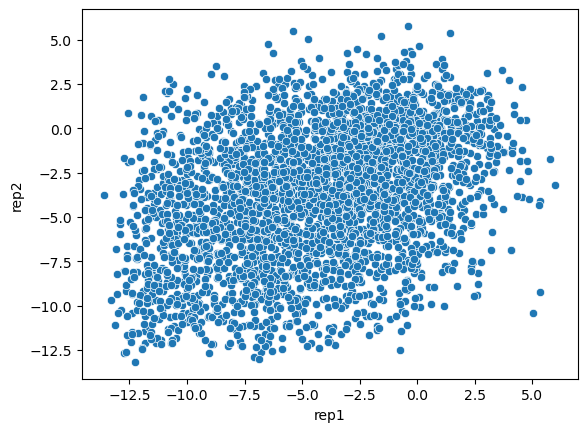

In [38]:
sns.scatterplot(df,x='rep1',y='rep2')
r, p = sp.stats.pearsonr(x=df['rep1'], y=df['rep2'])
print(r,p,len(df))